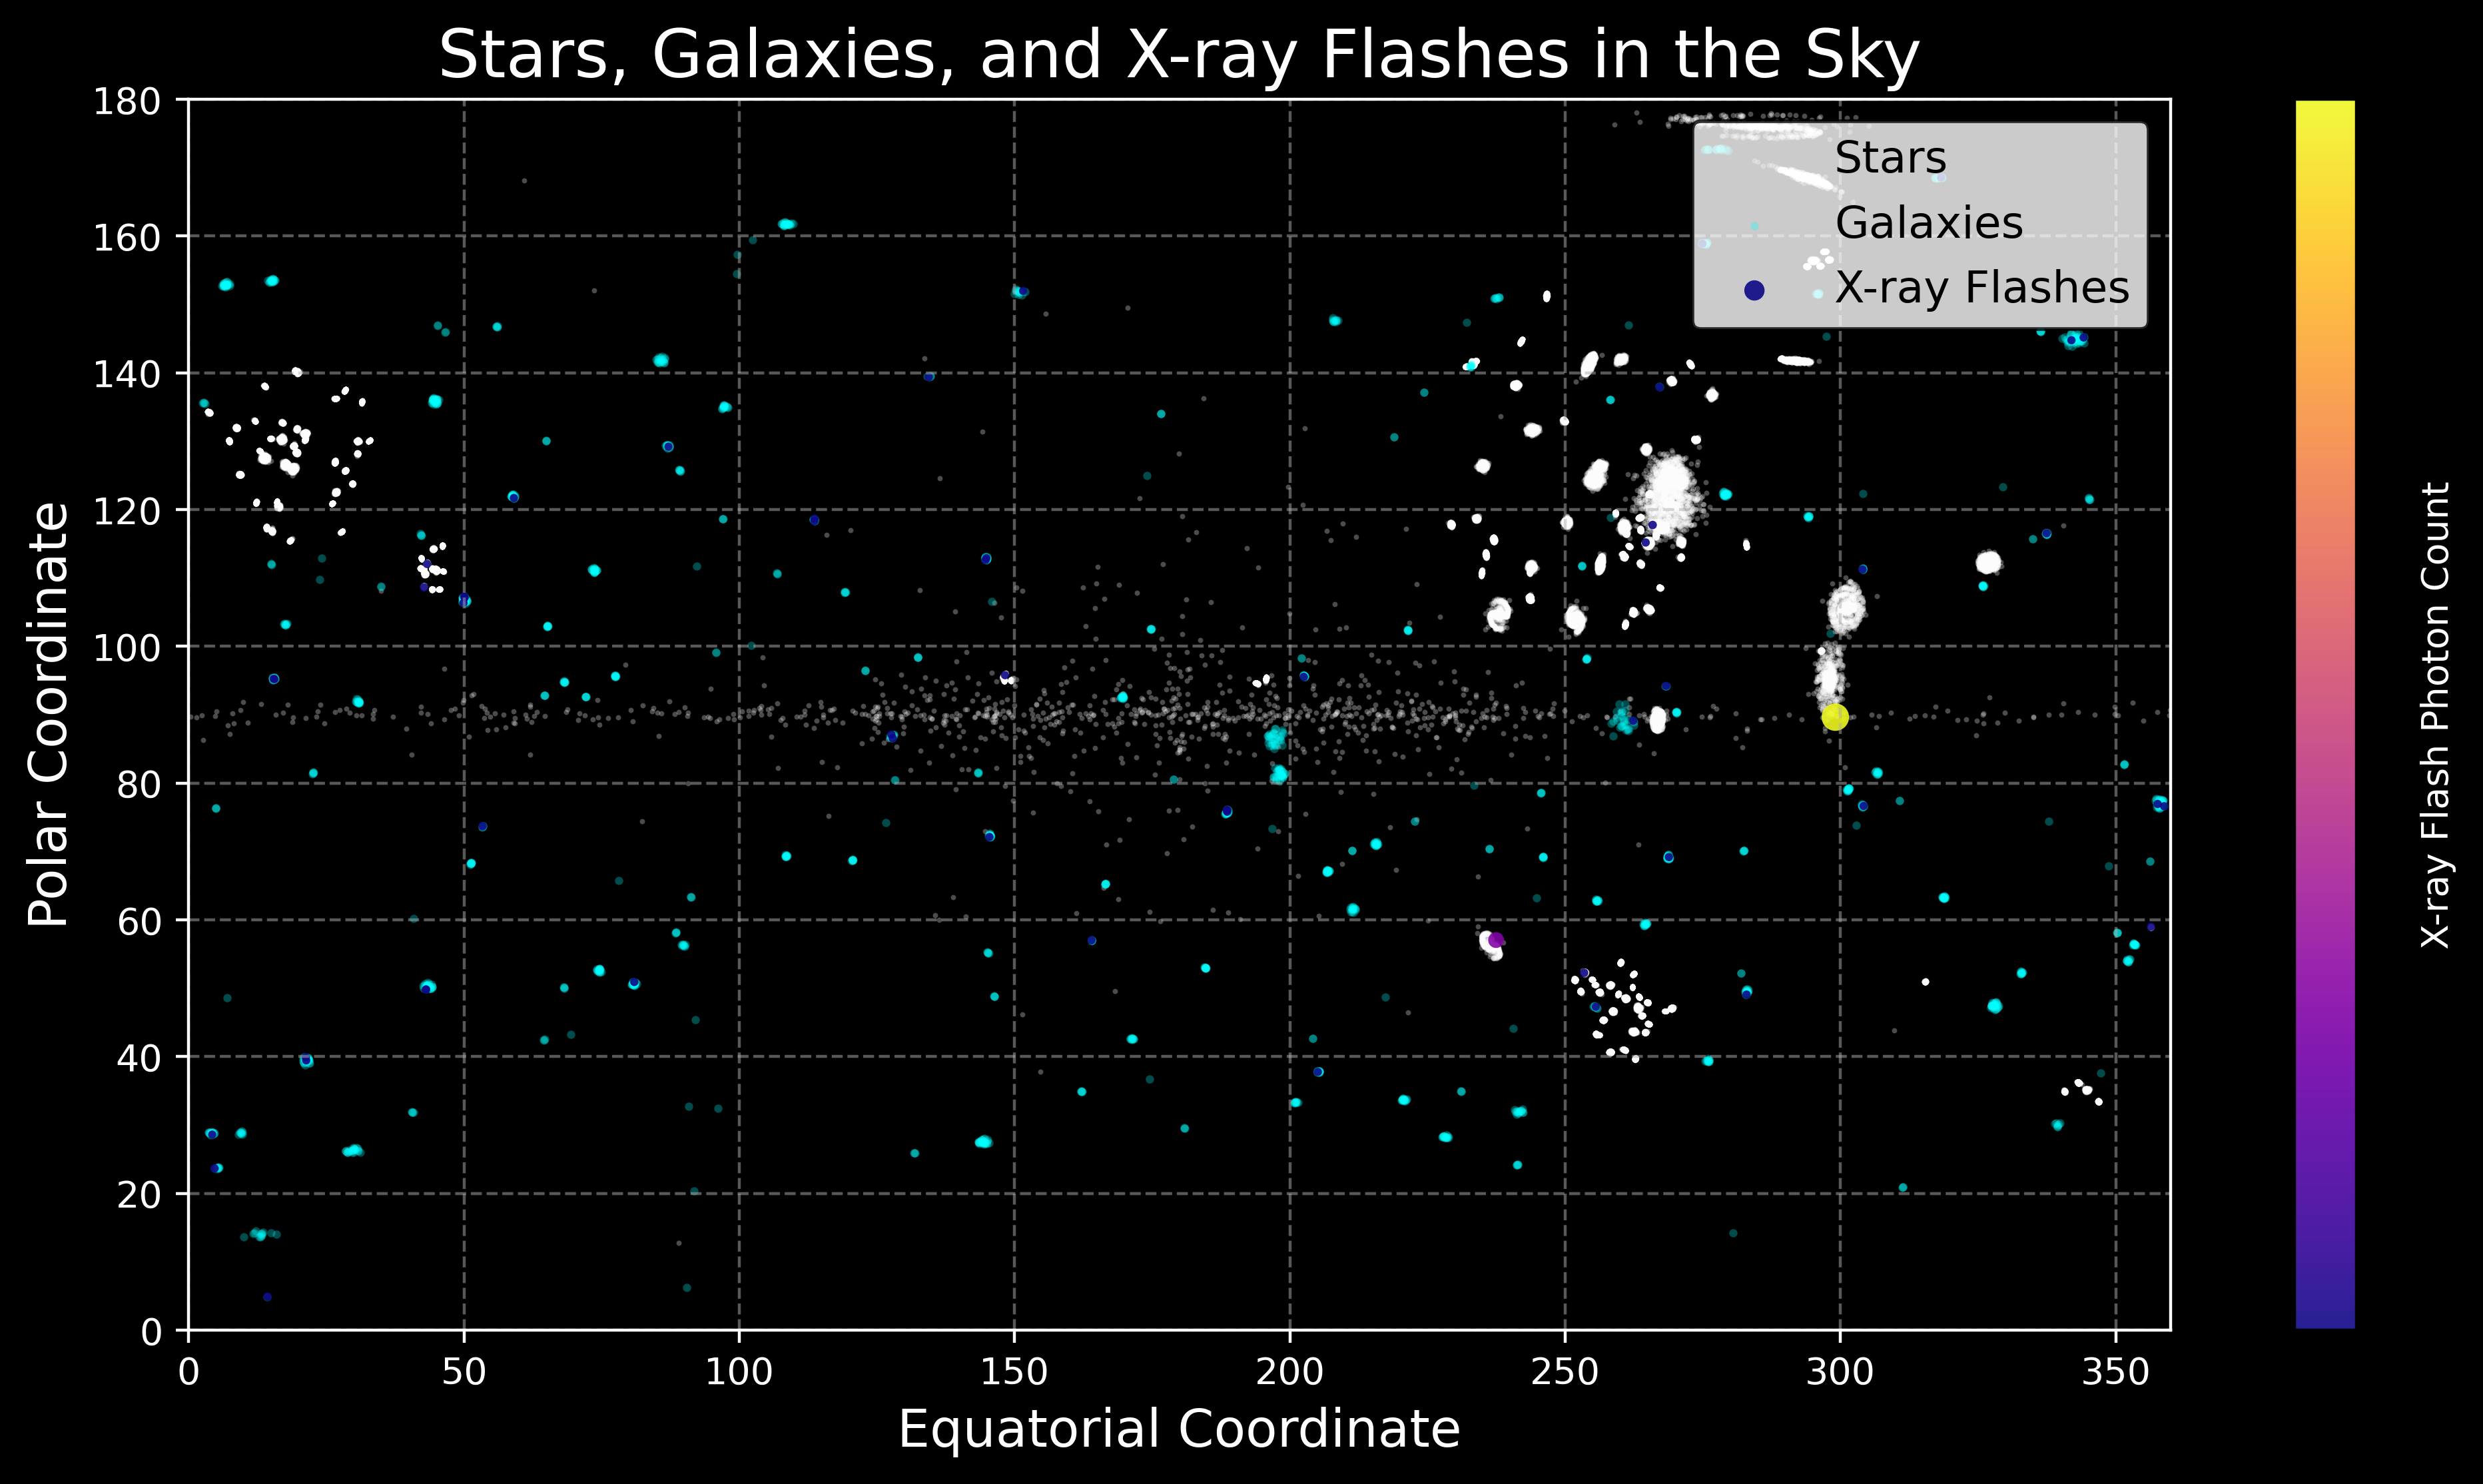

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# Read in all the converted datasets
stars = pd.read_csv("/Users/kobibrown/Desktop/Distance_Ladder_Project/Converted_Star_Data.csv")
galaxies = pd.read_csv("/Users/kobibrown/Desktop/Distance_Ladder_Project/Converted_Distant_Galaxy_Data.csv")
xray_flashes = pd.read_csv("/Users/kobibrown/Desktop/Distance_Ladder_Project/Converted_Flash_Data.csv")

# Normalize photon count so we can plot the markers appropriately
min_photon_count = xray_flashes['Photon-Count'].min()
max_photon_count = xray_flashes['Photon-Count'].max()
normalized_photon_count = (xray_flashes['Photon-Count'] - min_photon_count) / (max_photon_count - min_photon_count)

# Plot
fig, ax = plt.subplots(figsize=(12, 6), dpi=400)

# Add stars and galaxies
ax.scatter(stars["Equat"], stars["Polar"], s=2, c='white', lw=0, alpha=0.3, label='Stars')
ax.scatter(galaxies["Equat"], galaxies["Polar"], s=5, c='cyan', lw=0, alpha=0.3, label='Galaxies')

# Plot x-ray flash data and make the markers relate to the number of photons
scatter = ax.scatter(xray_flashes["Equat"], xray_flashes["Polar"], s=(normalized_photon_count + 0.1) * 50, c=xray_flashes["Photon-Count"], cmap='plasma', lw=0, alpha=0.9, label='X-ray Flashes')

# Plot limits
ax.set_xlim(0, 360)
ax.set_ylim(0, 180)

# Labels
ax.set_xlabel("Equatorial Coordinate", fontsize=14, color='white')
ax.set_ylabel("Polar Coordinate", fontsize=14, color='white')
ax.set_title("Stars, Galaxies, and X-ray Flashes in the Sky", fontsize=18, color='white')

# Gridlines and black background
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

# Set the tick colors and grid to white
ax.tick_params(colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Legend
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='upper right', fontsize=12, facecolor='white', edgecolor='black')
for text in legend.get_texts():
    text.set_color("black")

# Add color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("X-ray Flash Photon Count", color="white")

# Show the plot
plt.show()


In [40]:
from tqdm import tqdm

# cluster data
cluster_data = pd.read_csv('/Users/kobibrown/Desktop/Distance_Ladder_Project/clustered_star_data.csv')

# photon threshold
threshold = 10000000

xray_data_above_threshold = xray_flashes[xray_flashes['Photon-Count'] > threshold]

clustered_xray_data = []

for idx, row in tqdm(xray_data_above_threshold.iterrows(), total=len(xray_data_above_threshold)):
    equat = row['Equat']
    polar = row['Polar']
    
    min_distance = float('inf')
    closest_cluster = None

    for _, cluster_row in cluster_data.iterrows():
        cluster_equat = cluster_row['Equat']
        cluster_polar = cluster_row['Polar']
        cluster_label = cluster_row['cluster']

        if cluster_label == -1:
            continue

        distance = np.sqrt((equat - cluster_equat) ** 2 + (polar - cluster_polar) ** 2)
        
        if distance < min_distance:
            min_distance = distance
            closest_cluster = cluster_label

    if closest_cluster == -1:
        print(f"X-ray flash at Equat: {equat}, Polar: {polar}, Photon-Count: {row['Photon-Count']} is not in any cluster. The closest cluster is {closest_cluster}.")
    else:
        print(f"X-ray flash at Equat: {equat}, Polar: {polar}, Photon-Count: {row['Photon-Count']} is in Cluster {closest_cluster}")

    clustered_xray_data.append([equat, polar, row['Photon-Count'], closest_cluster])

clustered_xray_df = pd.DataFrame(clustered_xray_data, columns=['Equat', 'Polar', 'Photon-Count', 'Cluster'])


 50%|██████████████████████▌                      | 1/2 [00:02<00:02,  2.06s/it]

X-ray flash at Equat: 237.4531, Polar: 57.0286, Photon-Count: 25440942 is in Cluster 25


100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.05s/it]

X-ray flash at Equat: 299.0741, Polar: 89.6328, Photon-Count: 97015393 is in Cluster 131


In [45]:
import pandas as pd

# Load star data
star_data = pd.read_csv('/Users/kobibrown/Desktop/Distance_Ladder_Project/star_data_with_luminosity_radii_and_uncertainties.csv')

print(star_data['cluster'].unique())

# Take input of the two clusters we want to find the average distance of
cluster1 = input("Enter the name of Cluster 1: ")
cluster2 = input("Enter the name of Cluster 2: ")

# Filter for the stars in the two clusters
cluster1_stars = star_data[star_data['cluster'] == cluster1]
cluster2_stars = star_data[star_data['cluster'] == cluster2]
cluster1_stars = cluster1_stars.dropna(subset=['Distance', 'Distance Uncertainty'])
cluster2_stars = cluster2_stars.dropna(subset=['Distance', 'Distance Uncertainty'])

# Calculate the average distance and distance uncertainty for each cluster
cluster1_avg_distance = cluster1_stars['Distance'].mean()
cluster1_avg_distance_uncertainty = cluster1_stars['Distance Uncertainty'].mean()
cluster2_avg_distance = cluster2_stars['Distance'].mean()
cluster2_avg_distance_uncertainty = cluster2_stars['Distance Uncertainty'].mean()

# Print the results
print(f"Average distance to {cluster1}: {cluster1_avg_distance:.2f} ± {cluster1_avg_distance_uncertainty:.2f}")
print(f"Average distance to {cluster2}: {cluster2_avg_distance:.2f} ± {cluster2_avg_distance_uncertainty:.2f}")


[  3  29  49  12  48   5 113 114  -1   2  52  76  53  14  13  77  56 138
   4 139  67 137  66  78 136  87  88  34  51  10  38   0  11  50  39  40
  42   1  41  89  30  15  69  90  31  21 128   7 129  22   6  35 118 119
  26  20  19  18  95 100 123 105  96 124  73  25 102 107 126 106 101  74
  84 127 141 140  45 103  86  83  91  68 115  97 143 104 110 142 122  63
 121  81  70 109  44  71 146 116  92 151  55 135  43 152 134  93 108 147
 111  57  59  60  36  80 149  82 130 150  79 133 158  58  27 112 155  72
 157  54 159 153 162  85 154 156 163 164  61 148 160  64  98  62 161 120
  99 117  94  75  65 145 144  46 132  47 131  37  28 125  33  17  32  23
  16  24   8   9]
Enter the name of Cluster 1: 25
Enter the name of Cluster 2: 131
Average distance to 25: nan ± nan
Average distance to 131: nan ± nan
